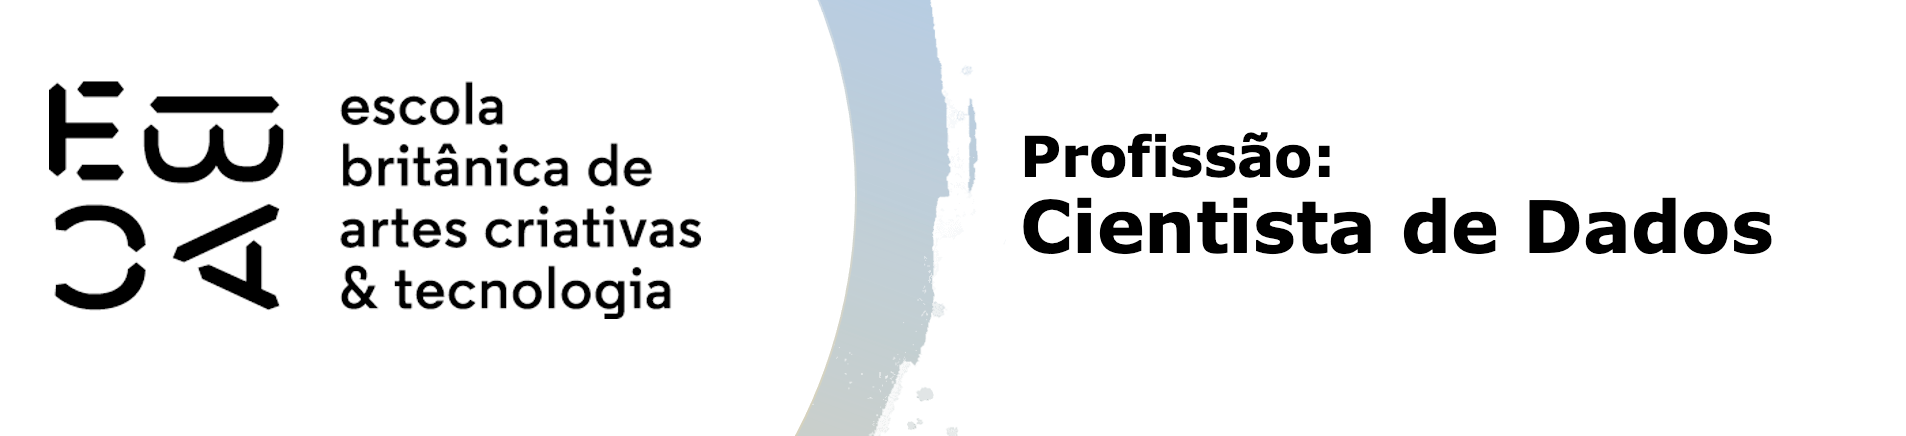

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

# Tarefa

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [5]:
df = df[['Administrative', 'Administrative_Duration', 'Informational',
         'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',]]
print("Informações Gerais do DataFrame:")
df.info()

Informações Gerais do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 578.1 KB


In [6]:
print("\nValores Ausentes (Missing) por Coluna:")
print(df.isnull().sum())


Valores Ausentes (Missing) por Coluna:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
dtype: int64


- Temos 12.330 registros e 18 colunas.
- Não há valores ausentes (missing) em nenhuma coluna. Isso é ótimo e simplifica nosso trabalho!
- Todas as colunas são numérica (`int64`, `float64`).

In [7]:
print("Estatísticas Descritivas - Variáveis Numéricas:")
df.describe()

Estatísticas Descritivas - Variáveis Numéricas:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230


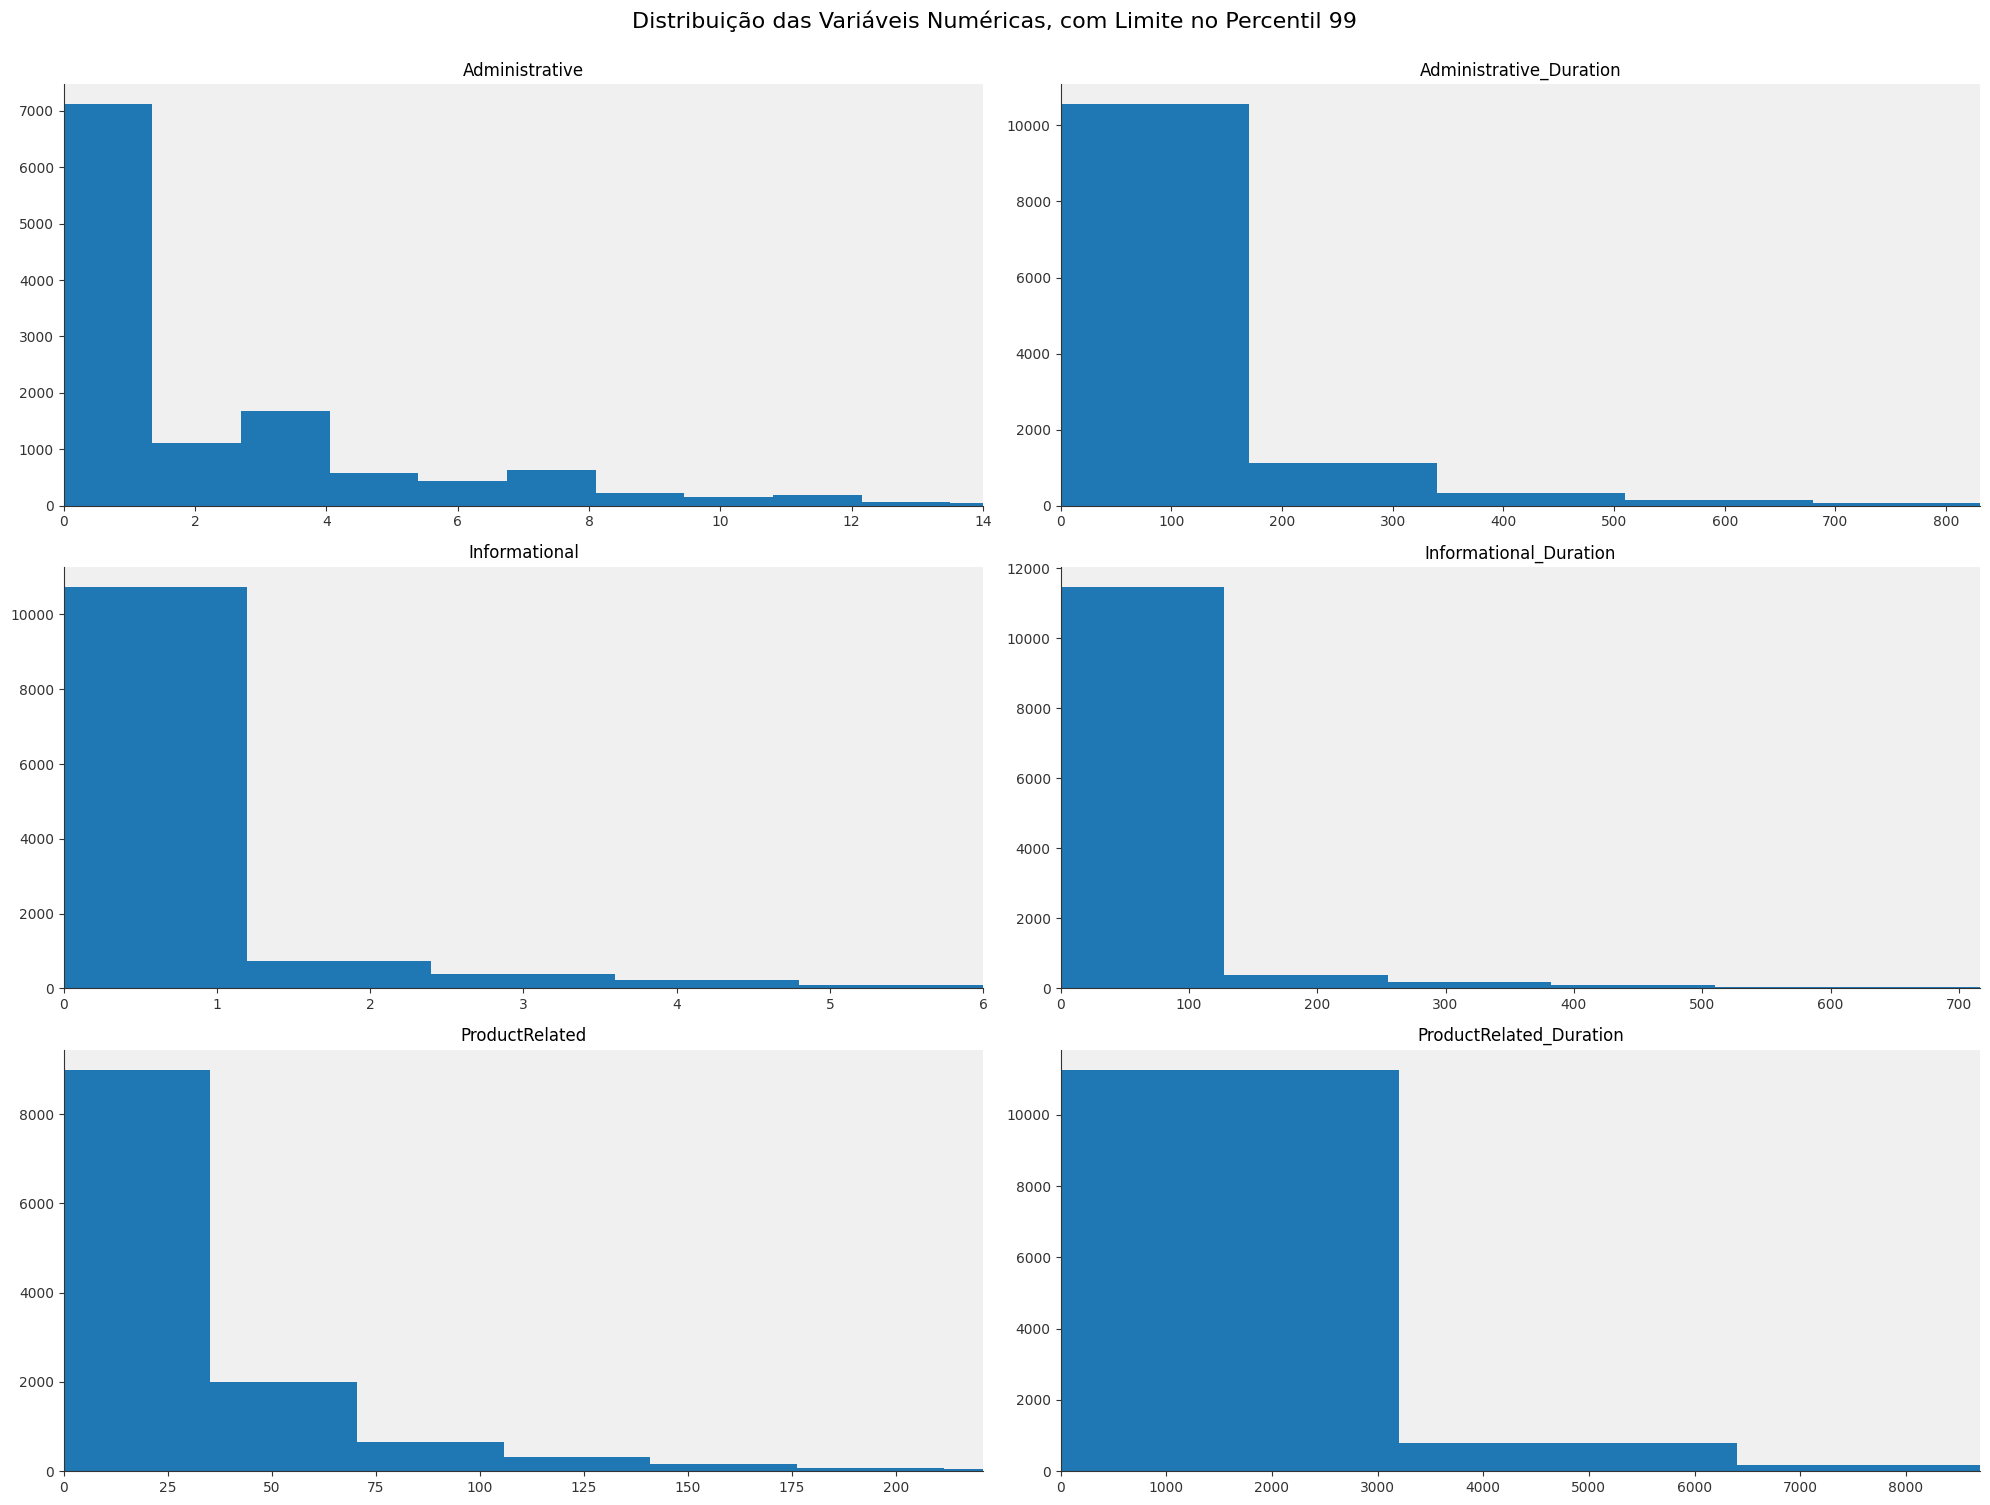

In [8]:
axes_array = df.hist(bins=20, figsize=(20, 15))

for ax in axes_array.flatten():
    ax.grid(False)
    ax.set_facecolor('#f0f0f0')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#333333')
    ax.spines['bottom'].set_color('#333333')
    ax.tick_params(axis='x', colors='#333333')
    ax.tick_params(axis='y', colors='#333333')
    ax.set_xlim(0, np.percentile(df[ax.get_title().split(' ')[0]], 99))
    for label in ax.get_xticklabels():
        label.set_fontsize(10)
    for label in ax.get_yticklabels():
        label.set_fontsize(10)
plt.suptitle("Distribuição das Variáveis Numéricas, com Limite no Percentil 99", y=1, fontsize=16)
plt.tight_layout()
plt.show()

- `Administrative`, `Informational`, `ProductRelated`: A grande maioria dos usuários não visita páginas administrativas ou informacionais. O foco principal é em páginas de produtos.
- `Administrative_Duration`, `Informational_Duration`: O tempo gasto nessas páginas também é muito concentrado perto de zero, o que é esperado. A maioria das sessões é curta.
- `ProductRelated_Duration`: O tempo gasto em páginas de produtos tem uma distribuição mais ampla, indicando que os usuários passam mais tempo explorando produtos.

- `Month`: A atividade é maior nos meses de Maio, Novembro e Março.
- `VisitorType`: A esmagadora maioria dos visitantes são "Returning_Visitor" (Visitantes Recorrentes), o que é comum em e-commerce.
- `Revenue`: A base de dados é bem desbalanceada. Apenas uma pequena fração das sessões (cerca de 15.5%) resulta em compra (`Revenue = True`). Isso é um ponto crucial a ser considerado na modelagem.

In [9]:
from sklearn.preprocessing import StandardScaler

colunas_escopo = ['Administrative', 'Administrative_Duration', 'Informational',
'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration']

df_escopo = df[colunas_escopo]

scaler = StandardScaler()
df_escopo_scaled = scaler.fit_transform(df_escopo)
df_escopo_scaled = pd.DataFrame(df_escopo_scaled, columns=colunas_escopo)
print("Estatísticas Descritivas - Variáveis Numéricas (Escalonadas):")
df_escopo_scaled.head(10)

Estatísticas Descritivas - Variáveis Numéricas (Escalonadas):


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430
5,-0.696993,-0.457191,-0.396478,-0.244931,-0.286270,-0.543757
6,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348
7,-0.395938,-0.457191,-0.396478,-0.244931,-0.713488,-0.624348
8,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.605012
9,-0.696993,-0.457191,-0.396478,-0.244931,-0.646033,-0.238685


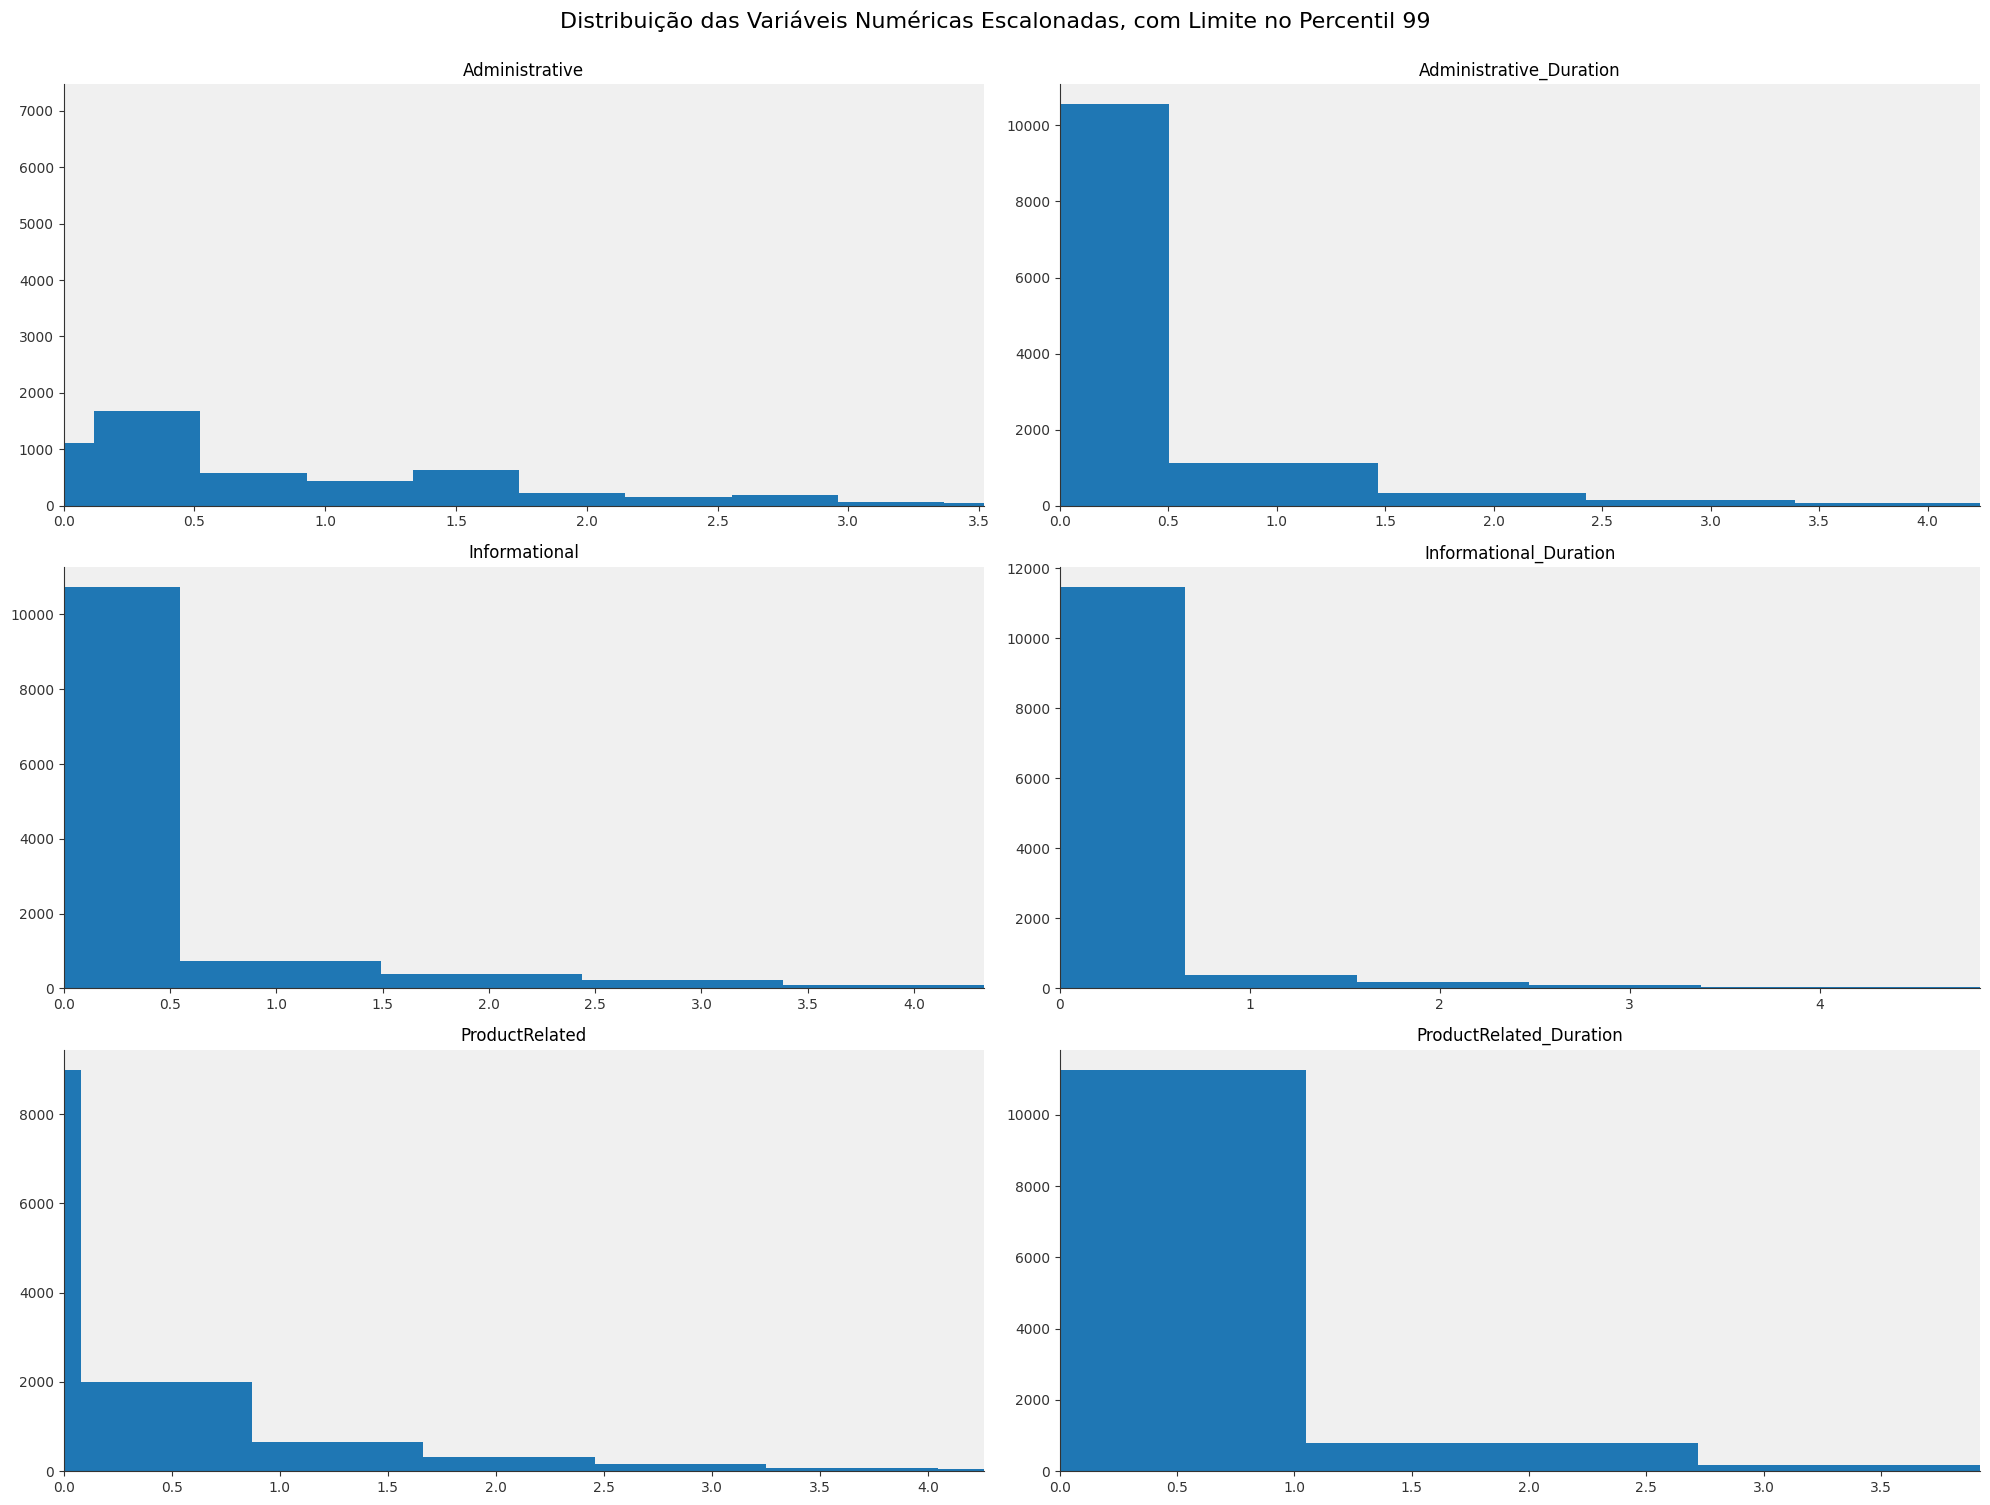

In [10]:
axes_array_scaled = df_escopo_scaled.hist(bins=20, figsize=(20, 15))

for ax in axes_array_scaled.flatten():
    ax.grid(False)
    ax.set_facecolor('#f0f0f0')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#333333')
    ax.spines['bottom'].set_color('#333333')
    ax.tick_params(axis='x', colors='#333333')
    ax.tick_params(axis='y', colors='#333333')
    ax.set_xlim(0, np.percentile(df_escopo_scaled[ax.get_title().split(' ')[0]], 99))
    for label in ax.get_xticklabels():
        label.set_fontsize(10)
    for label in ax.get_yticklabels():
        label.set_fontsize(10)
plt.suptitle("Distribuição das Variáveis Numéricas Escalonadas, com Limite no Percentil 99", y=1, fontsize=16)
plt.tight_layout()
plt.show()

## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

In [11]:
SQD = []
K = range(2,11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_escopo_scaled)
    SQD.append(km.inertia_)

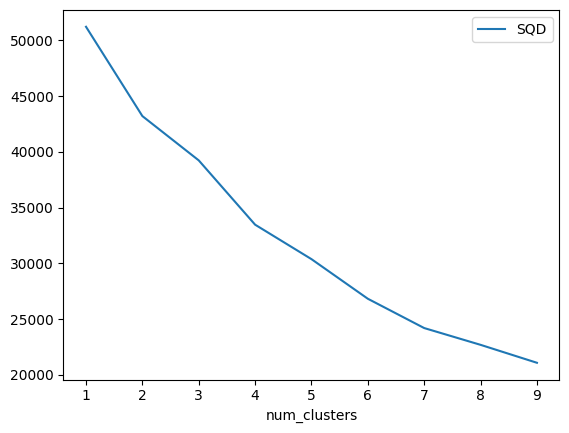

In [12]:
df = pd.DataFrame({'num_clusters': list(range(1, len(SQD)+1)), 'SQD': SQD})
df.plot(x = 'num_clusters', y = 'SQD');

O metodo do cotovelo não ajuda a identificar o número ideal de clusters ao observar a variação da soma dos quadrados dentro do cluster (SQD) em relação ao número de clusters (k).

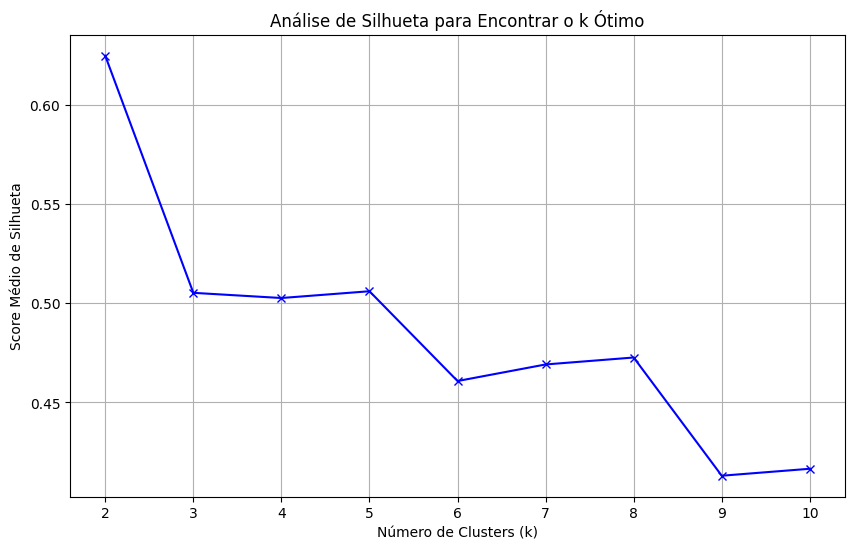

In [13]:


range_n_clusters = range(2, 11)
silhouette_avg = []

for n_clusters in range_n_clusters:
# Rodar o K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=4)
    cluster_labels = kmeans.fit_predict(df_escopo_scaled)

    # Calcular o score de silhueta
    silhouette_avg.append(silhouette_score(df_escopo_scaled, cluster_labels))

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Score Médio de Silhueta')
plt.title('Análise de Silhueta para Encontrar o k Ótimo')
plt.grid(True)
plt.show()


O metodo da silhueta sugere que o número ideal de clusters é 2, pois é onde o score médio de silhueta atinge seu valor máximo.

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

Vamos avaliar os agrupamentos para k=2 e k=4.

In [14]:
kmeans_k2 = KMeans(n_clusters=2, random_state=4)
clusters_k2 = kmeans_k2.fit_predict(df_escopo_scaled)

df_analise = df_escopo.copy()
df_analise['Cluster'] = clusters_k2

analise_k2 = df_analise.groupby('Cluster').mean()

print("--- Análise Descritiva para k=2 ---")
display(analise_k2)

print("\n--- Tamanho de cada Cluster ---")
print(df_analise['Cluster'].value_counts())

--- Análise Descritiva para k=2 ---


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
Cluster,,,,,,
0,1.509235,44.791811,0.191576,7.143616,21.447418,779.762169
1,7.293364,303.354345,2.430733,203.280915,95.255530,3758.081929



--- Tamanho de cada Cluster ---
Cluster
0    10612
1     1718
Name: count, dtype: int64


### Interpretação e Nomes para k=2
- Cluster 0 (10.612 usuários): Este é o grupo dominante. Eles têm valores muito baixos em todas as métricas. Passam pouquíssimo tempo no site, visitam poucas páginas de qualquer tipo.
- Cluster 1 (1.718 usuários): Este grupo é muito mais engajado. Eles visitam um número significativamente maior de páginas de todos os tipos (`Administrative`, `Informational`, `ProductRelated`) e, mais importante, passam muito mais tempo no site (`_Duration`).

In [15]:
kmeans_k4 = KMeans(n_clusters=4, random_state=42)
clusters_k4 = kmeans_k4.fit_predict(df_escopo_scaled)

df_analise['Cluster'] = clusters_k4

analise_k4 = df_analise.groupby('Cluster').mean()

print("--- Análise Descritiva para k=4 ---")
display(analise_k4)

print("\n--- Tamanho de cada Cluster ---")
print(df_analise['Cluster'].value_counts())

--- Análise Descritiva para k=4 ---


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
Cluster,,,,,,
0,6.663457,260.887953,0.729978,26.768616,53.029322,1952.814380
1,5.584055,194.262921,4.306759,466.857194,59.655113,2462.010839
2,0.876654,23.316800,0.157192,5.507445,19.062920,696.814243
3,8.068000,293.362104,2.428000,174.936582,239.736000,9700.904340



--- Tamanho de cada Cluster ---
Cluster
2    9218
0    2285
1     577
3     250
Name: count, dtype: int64


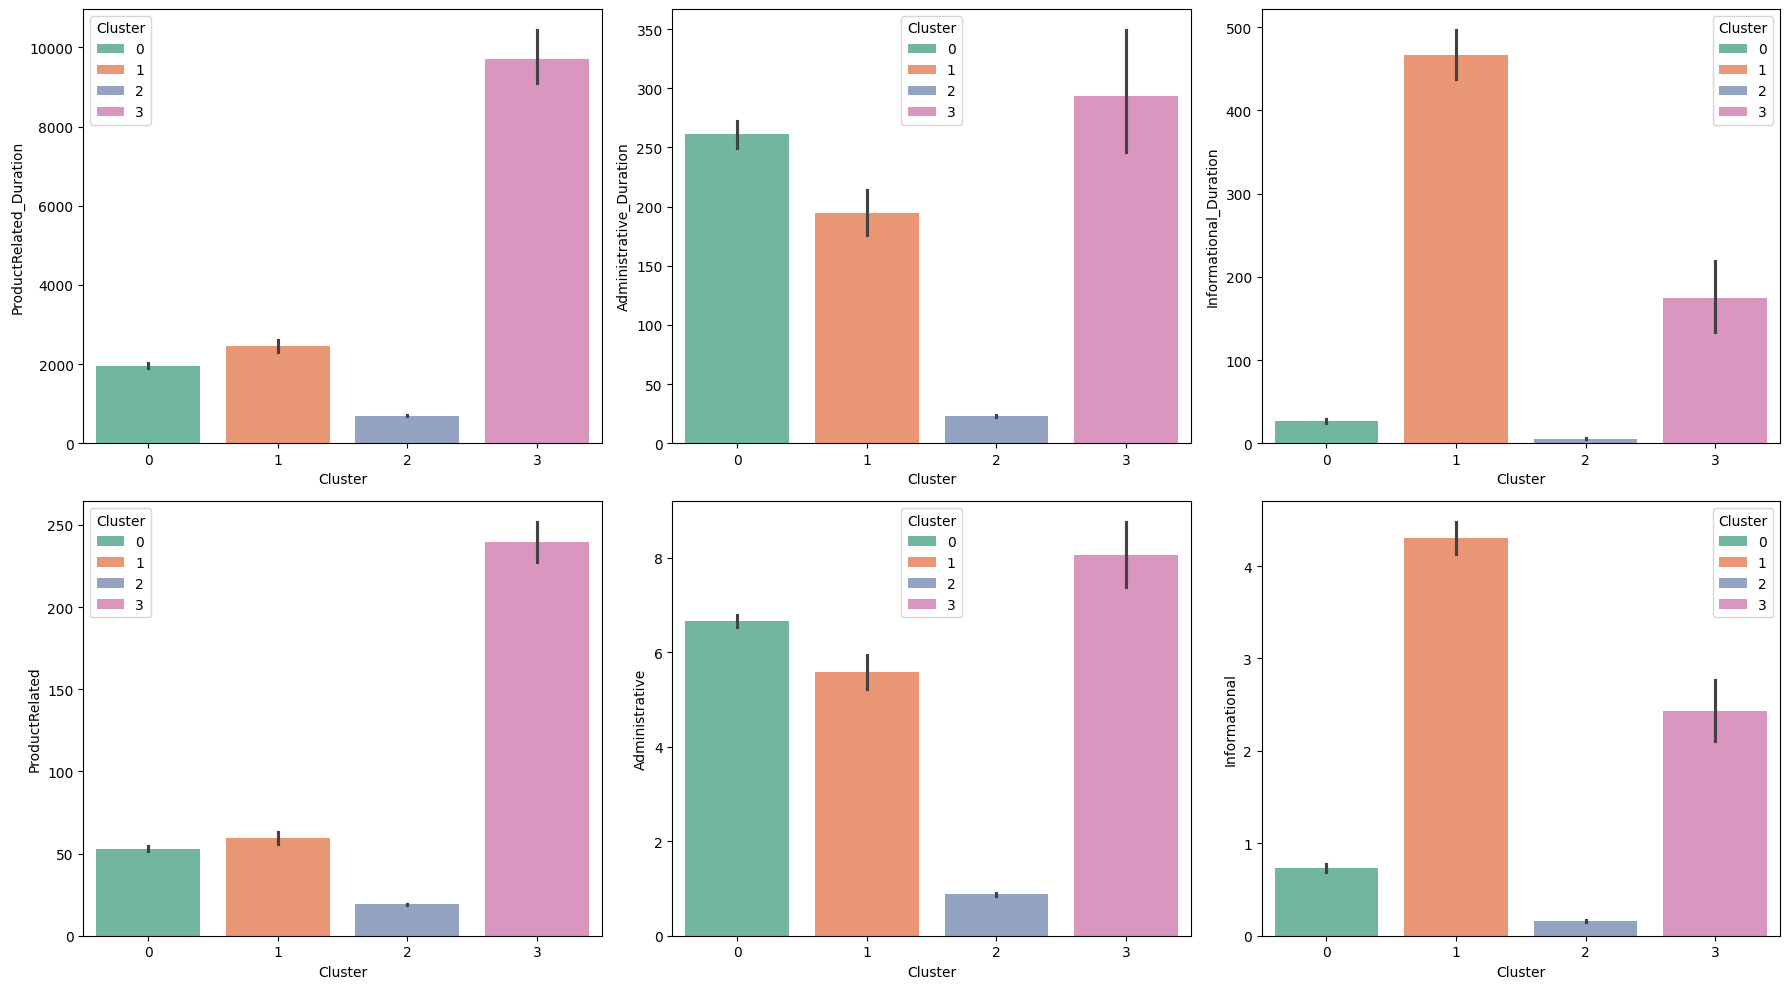

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.barplot(x='Cluster', y='ProductRelated_Duration', data=df_analise, ax=axes[0, 0], hue='Cluster', palette='Set2')
sns.barplot(x='Cluster', y='Administrative_Duration', data=df_analise, ax=axes[0, 1], hue='Cluster', palette='Set2')
sns.barplot(x='Cluster', y='Informational_Duration', data=df_analise, ax=axes[0, 2], hue='Cluster', palette='Set2')
sns.barplot(x='Cluster', y='ProductRelated', data=df_analise, ax=axes[1, 0], hue='Cluster', palette='Set2')
sns.barplot(x='Cluster', y='Administrative', data=df_analise, ax=axes[1, 1], hue='Cluster', palette='Set2')
sns.barplot(x='Cluster', y='Informational', data=df_analise, ax=axes[1, 2], hue='Cluster', palette='Set2')
plt.tight_layout()
plt.show()



- Cluster 0 (2.285 usuários): Este grupo se destaca pelo alto uso de páginas administrativas. Eles visitam muitas páginas (`Administrative`) e passam um tempo considerável nelas (`Administrative_Duration`).<br><br>
- Cluster 1 (577 usuários): Um grupo pequeno, mas muito específico. Eles são os campeões em visitar páginas informacionais (`Informational`) e gastar tempo nelas (`Informational_Duration`).<br><br>
- Cluster 2 (9.218 usuários): Praticamente não navegam (`Administrative` e `Informational` quase zero) e passam pouquíssimo tempo em páginas de produto.<br><br>
- Cluster 3 (250 usuários): Este é o grupo com o maior foco em produtos. Eles têm o maior número de visitas a páginas de produto (`ProductRelated`) e o maior tempo gasto nelas (`ProductRelated_Duration`). O uso de páginas administrativas e informacionais é moderado.

O agrupamento final escolhido é k=4, pois oferece uma segmentação mais detalhada dos usuários, permitindo identificar perfis distintos de comportamento de navegação.

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

In [17]:
df_original = pd.read_csv('online_shoppers_intention.csv')
df_original['Cluster'] = clusters_k4
colunas_avaliacao = ['BounceRates', 'ExitRates', 'PageValues', 'Revenue', 'Cluster']
df_avaliacao = df_original[colunas_avaliacao]
analise_resultados = df_avaliacao.groupby('Cluster').mean()

nomes_clusters = {
0: 'Cluster 0',
1: 'Cluster 1',
2: 'Cluster 2',
3: 'Cluster 3'
}
analise_resultados = analise_resultados.rename(index=nomes_clusters)

print("--- Avaliação dos Grupos vs. Métricas de Negócio ---")
display(analise_resultados)

--- Avaliação dos Grupos vs. Métricas de Negócio ---


,BounceRates,ExitRates,PageValues,Revenue
Cluster,,,,
Cluster 0,0.006470,0.019847,8.938011,0.228009
Cluster 1,0.007625,0.021658,10.019085,0.266898
Cluster 2,0.027456,0.050849,4.888274,0.124322
Cluster 3,0.005382,0.018068,5.400274,0.348000


Analisando as variáveis fora do escopo, especialmente `BounceRates` e `Revenue`, podemos tirar algumas conclusões sobre os grupos formados:
- O grupo com maior propensão à compra é o Cluster 3 (Focado em Produtos). Eles não apenas visitam mais páginas de produtos, mas também têm uma taxa de conversão significativamente maior. Isso sugere que o interesse genuíno em produtos está fortemente correlacionado com a decisão de compra.
- O Cluster 1 (Exploradores Informacionais) também mostra uma taxa de conversão razoável, indicando que usuários que buscam informações detalhadas podem estar mais inclinados a comprar.